# Semana Data Science na Prática
## Análise da Criminalidade em São Paulo

Este projeto faz parte de uma série de aulas gratuitas sobre Data Science, Machine Learning e Inteligência Artificial, produzidas pelo [Sigmoidal](https://sigmoidal.ai).

<center><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/saopaulo_skyline.png"></center>


## Contextualização do Problema

A criminalidade é um problema recorrente no Brasil. Buscamos sempre formas de diminuir esses índices e usando técnicas de **Ciências de Dados** conseguimos entender melhor o que está acontecendo e gerar *insights* que direcionem ações capazes de diminuir os índices de criminalidade.


## Obtenção dos Dados

Os dados utilizados nesse projeto estão disponíveis [neste link](https://www.kaggle.com/danlessa/geospatial-sao-paulo-crime-database) e são referentes a crimes ocorridos na cidade de São Paulo, de 2010-2018.

Dados como esses podem ser obtidos diretamente das secretarias de cada estado. Entretanto, a vantagem desses que utilizaremos é que já foi feito um processo de limpeza neles, o que facilita nosso trabalho na hora de explorá-los.


Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Definindo o estilo dos gráficos
sns.set_style()

Carregando os dados

In [2]:
#Carregando os dados
df = pd.read_csv('criminalidade_sp.csv', parse_dates = ['time'])

#Transformando a coluna 'time' em datetime e definindo como índice do dataframe
df.index = pd.to_datetime(df['time'], infer_datetime_format=True)

df.head()

,id,bairro,created_at,descricao,endereco,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",-23.580973,-46.719192,True,0,6,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",-23.540105,-46.462872,True,1,1,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,-23.541765,-46.469562,True,1,1,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",-23.611693,-46.725935,True,0,5,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",-23.544564,-46.721567,True,1,1,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


### Dicionário de Variáveis

De acordo com a fonte dos dados, essa é a descrição de cada uma das variáveis presentes no dataset.

* `id` - Número de identificação da ocorrência
* `bairro` - Bairro onde ocorreu o crime
* `created_at` - Data de criação da ocorrência
* `descricao` - Descrição da ocorrência
* `endereco` - Endereço da ocorrência
* `id.1` - Desconhecido
* `ip_address_origin` -  Endereço de IP de quem criou o registro
* `latitude` - Latitude da ocorrência
* `longitude` - Longitude da ocorrência
* `registrou_bo` - Indica se a vítima registrou boletim de ocorrência
* `sexo` - Sexo da vítima
* `tipo_assalto_id` - Tipo de assalto
* `titulo` - Título da ocorrência
* `uri` - URI do incidente
* `user_id` - ID do usuário
* `valor_prejuizo` - Valor do prejuízo em reais

A partir daqui, temos variáveis que tem como valor True (1) e NaN (Nulo). Mais a frente vamos tratar essas variáveis.

Quando assinalado sim, significa que o item foi roubado. Caso seja NaN, significa que não foi levado.
* `Bicicleta`
* `Bolsa ou Mochila`
* `Carteira`
* `Cartão de Crédito`
* `Celular`
* `Computador`
* `DVD`
* `Dinheiro`
* `Documentos`
* `Equipamento de Som`
* `Estepe`
* `MP4 ou Ipod`
* `Móveis`
* `Notebook`
* `Outros`
* `Relógio`
* `Som`
* `Tablet`
* `Tv`


* `time` - Data e horário do incidente

Tamanho do conjunto de dados

In [4]:
df.shape

(11196, 32)

Verificando informações sobre o dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11196 entries, 2010-12-20 20:30:00 to 2012-03-02 09:44:00
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11196 non-null  int64         
 1   bairro              11196 non-null  object        
 2   created_at          11196 non-null  object        
 3   descricao           11195 non-null  object        
 4   endereco            11196 non-null  object        
 5   latitude            11196 non-null  float64       
 6   longitude           11196 non-null  float64       
 7   registrou_bo        11196 non-null  bool          
 8   sexo                11196 non-null  int64         
 9   tipo_assalto_id     11196 non-null  int64         
 10  titulo              11196 non-null  object        
 11  valor_prejuizo      11196 non-null  float64       
 12  Bicicleta           11196 non-null  bool          
 13  Bolsa ou Mo

Distribuição estatística das variáveis numéricas

In [6]:
df.describe()

,id,latitude,longitude,sexo,tipo_assalto_id,valor_prejuizo
count,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000
mean,44295.551715,-23.565957,-46.637630,0.611200,3.164880,2807.287128
std,26279.537992,0.388178,0.462609,0.487499,2.751647,11670.300950
min,323.000000,-24.241930,-52.173376,0.000000,1.000000,0.000000
25%,22791.750000,-23.606828,-46.696568,0.000000,2.000000,50.000000
50%,39373.500000,-23.567145,-46.648936,1.000000,2.000000,700.000000
75%,71062.250000,-23.541547,-46.607699,1.000000,3.000000,2000.000000
max,88573.000000,-0.013911,0.004533,1.000000,11.000000,1000000.000000


Distribuição estatística das variáveis categóricas

In [7]:
df.describe(include='O')

,bairro,created_at,descricao,endereco,titulo
count,11196,11196,11195,11196,11196
unique,1577,11196,11195,10465,9016
top,São Paulo,2014-09-15 23:18:33.037,Dois indivíduos entraram no mercado e renderam...,Carregando endereço,Fui assaltado voltando do trabalho
freq,630,1,1,15,126


## Tratamento dos dados

In [8]:
#Criando uma cópia do dataframe
df_clean = df.copy()

# colunas booleanas
bool_columns = ['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
                'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos',
                'Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
                'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'registrou_bo']

# substituindo NaN por False
df_clean[bool_columns] = df_clean[bool_columns].fillna(False)

# verificando o resultado
df_clean.head()

,id,bairro,created_at,descricao,endereco,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",-23.580973,-46.719192,True,0,6,...,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",-23.540105,-46.462872,True,1,1,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,-23.541765,-46.469562,True,1,1,...,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",-23.611693,-46.725935,True,0,5,...,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",-23.544564,-46.721567,True,1,1,...,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


In [9]:
# checando a porcentagem de valores ausentes para cada variável
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

descricao             0.000089
time                  0.000000
Tv                    0.000000
bairro                0.000000
created_at            0.000000
endereco              0.000000
latitude              0.000000
longitude             0.000000
registrou_bo          0.000000
sexo                  0.000000
tipo_assalto_id       0.000000
titulo                0.000000
valor_prejuizo        0.000000
Bicicleta             0.000000
Bolsa ou Mochila      0.000000
Carteira              0.000000
Cartão de Crédito     0.000000
Celular               0.000000
Computador            0.000000
DVD                   0.000000
Dinheiro              0.000000
Documentos            0.000000
Equipamento de Som    0.000000
Estepe                0.000000
MP4 ou Ipod           0.000000
Móveis                0.000000
Notebook              0.000000
Outros                0.000000
Relógio               0.000000
Som                   0.000000
Tablet                0.000000
id                    0.000000
dtype: f

Removendo algumas colunas

## Análise Exploratória

Proporção entre homens e mulheres

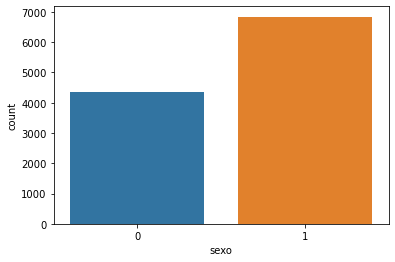

In [13]:
# crimes por sexo
sns.countplot(x='sexo', data=df_clean);

Boletins de ocorrência

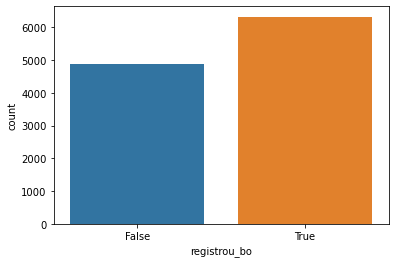

In [14]:
# registro de boletins de ocorrência
sns.countplot(x='registrou_bo', data=df_clean);

Criminalidade por bairros

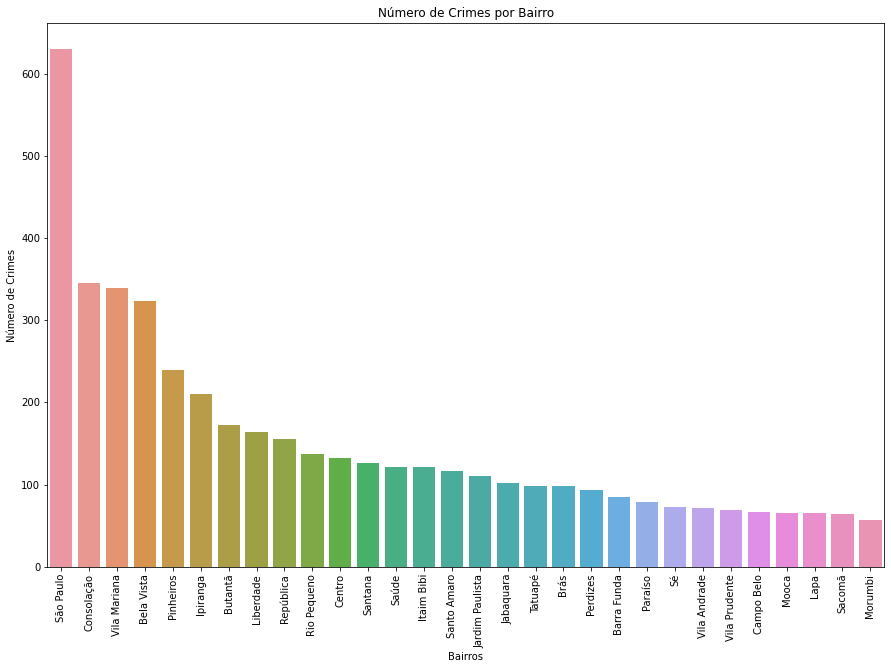

In [23]:
# coletando e ordenando os valores para cada bairro
bairros = df_clean.bairro.value_counts().sort_values(ascending=False).iloc[0:30]

# criando a visualização
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(bairros.index, bairros.values);

# definindo o título do eixo y
plt.ylabel('Número de Crimes')
# definindo o título do eixo x
plt.xlabel('Bairros')
# definindo o título da visualização
plt.title('Número de Crimes por Bairro')
# rotacionando a legenda do eixo x para melhor visualização
plt.xticks(rotation=90);
# plotando a visualização
plt.show()

Tendência de Criminalidade

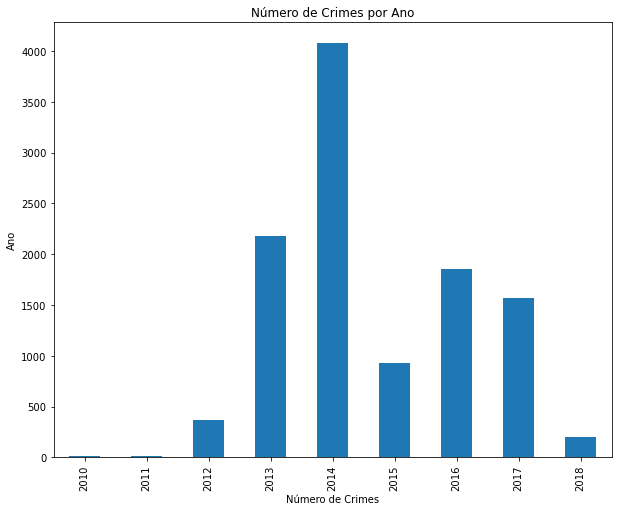

In [24]:
# índice de crimes por ano
# criando a visualização
fig,ax = plt.subplots(figsize=(10,8))
df_clean.groupby([df_clean.index.year]).size().plot(kind='bar')
# definindo o título do eixo y
plt.ylabel('Ano')
# definindo o título do eixo x
plt.xlabel('Número de Crimes')
# definindo o título da visualização
plt.title('Número de Crimes por Ano')
#plotando a visualização
plt.show()

Removendo os Outliers das Latitudes e Longitudes

In [25]:
# erros de lançamento em lat/lon
df_clean[['latitude', 'longitude']].describe()

,latitude,longitude
count,11196.000000,11196.000000
mean,-23.565957,-46.637630
std,0.388178,0.462609
min,-24.241930,-52.173376
25%,-23.606828,-46.696568
50%,-23.567145,-46.648936
75%,-23.541547,-46.607699
max,-0.013911,0.004533


In [26]:
excluir = df_clean[(df_clean.latitude < -26.6) | (df_clean.latitude > -22)].index
df_clean = df_clean.drop(index=excluir)

In [27]:
excluir = df_clean[(df_clean.longitude < -53) | (df_clean.longitude > -46)].index
df_clean = df_clean.drop(index=excluir)

In [ ]:
# exportar o dataset limpo
df_clean.to_csv('criminalidade_sp.csv', index=False)